_version log: average 1D fourier transform of every row_

In [80]:
from numpy import genfromtxt
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

pixel_pitch = 9.9 #um

beamABroadband = genfromtxt('data\\0307_BB_BA.csv', delimiter=';') #data\\beama2_broad.csv
beamBBroadband = genfromtxt('data\\0307_BB_BB.csv', delimiter=';') #data\\beamb2_broad.csv
fringesBroadband = genfromtxt('data\\0307_fringesBB.csv', delimiter=';') #data\\fringes2_broad.csv

In [81]:
#run this cell to import .tif and .tiff images insted
from PIL import Image

im = Image.open('data\\green_BA.tif')
beamABroadband = np.array(im) #this data is narrowband but I can't be bothered to change the name
im = Image.open('data\\green_BB.tif')
beamBBroadband = np.array(im)
im = Image.open('data\\green_fringes.tiff')
fringesBroadband = np.array(im)

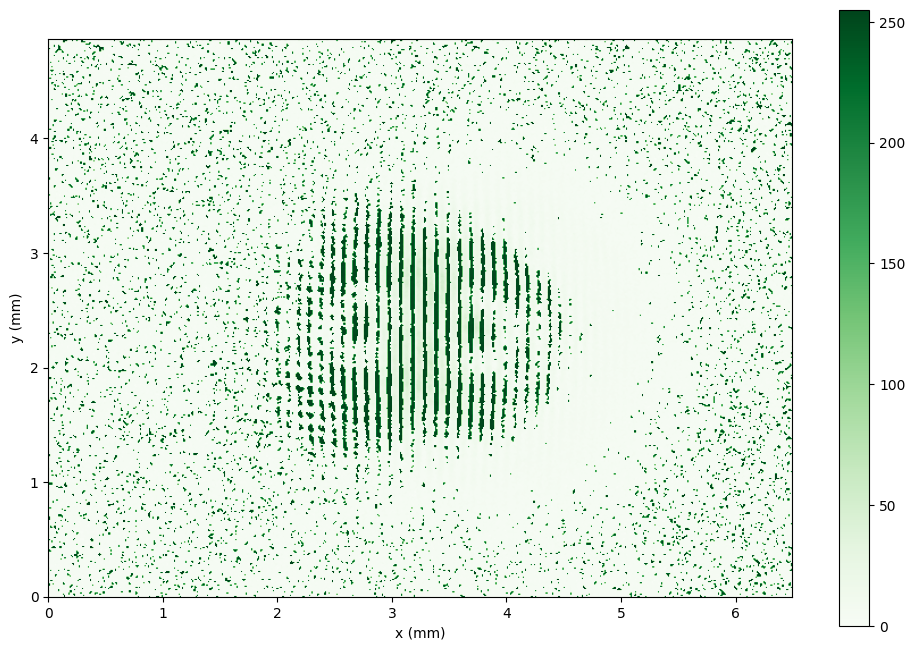

24.743406702359707


In [82]:
BeamBackground = np.maximum(beamABroadband, beamBBroadband) #Esimate the background light
#BeamBackground = beamABroadband + beamBBroadband #this is also a good estimation
fringesCOR = ndimage.median_filter(fringesBroadband - BeamBackground, size=2)

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1, 1, 1)

x_max = pixel_pitch*fringesCOR.shape[1] *1e-3
y_max = pixel_pitch*fringesCOR.shape[0] *1e-3

im=plt.imshow(fringesCOR, cmap='Greens', extent=[0,x_max,0,y_max])

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.colorbar(im)
plt.show()

print(fringesCOR.mean()) #We expect this to be close to 0

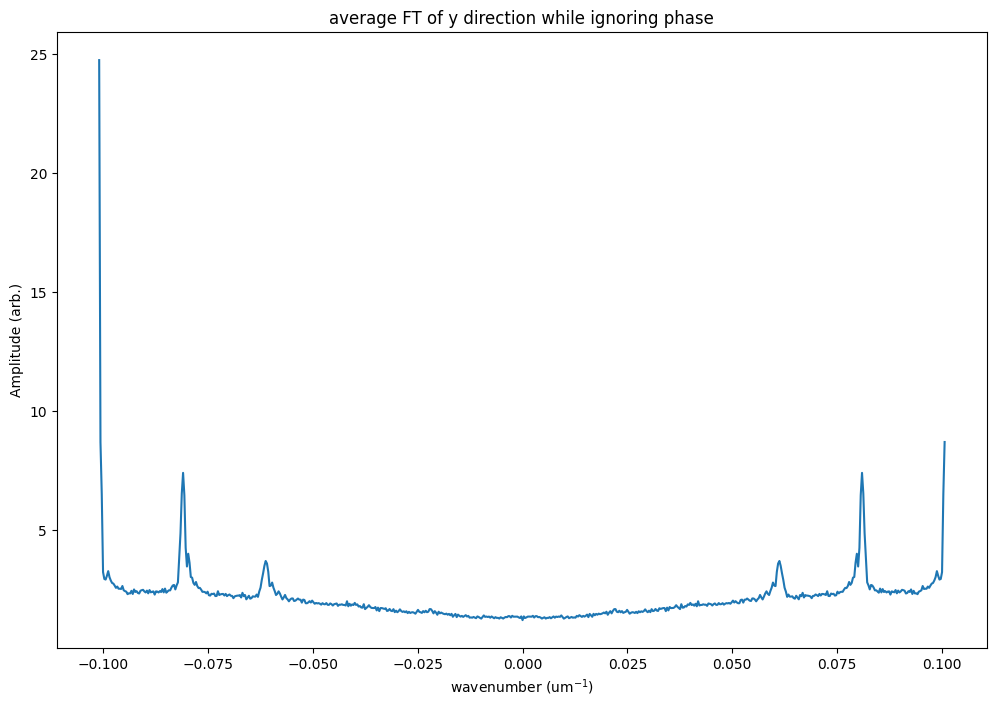

In [85]:
FT = np.fft.fft(fringesCOR, norm = "forward", axis = 1)

average_FT = np.mean(np.abs(FT), axis=0)
#average_FT = np.fft.fftshift(average_FT) #rearranges the array such that 0,0 is centred

num_of_freqs = len(average_FT)//2 +1
samples = len(average_FT)
freqs = np.linspace(-1/pixel_pitch, 0, num_of_freqs)
freqs = np.concatenate((freqs, -freqs[-2::-1]))
freqs = freqs[:len(average_FT)]

plt.figure(figsize = (12,8))
plt.subplot(1, 1, 1)

plt.plot(freqs,
        average_FT)

plt.xlabel('wavenumber (um$^{-1}$)')
plt.ylabel('Amplitude (arb.)')
#plt.yscale("log")
plt.title("average FT of y direction while ignoring phase")

plt.show()

C:\Users\syf83691\AppData\Local\Temp\ipykernel_14420\1026476668.py:17: RuntimeWarning: divide by zero encountered in divide
  wavelengths = -1/freqs[:-num_of_freqs +2]


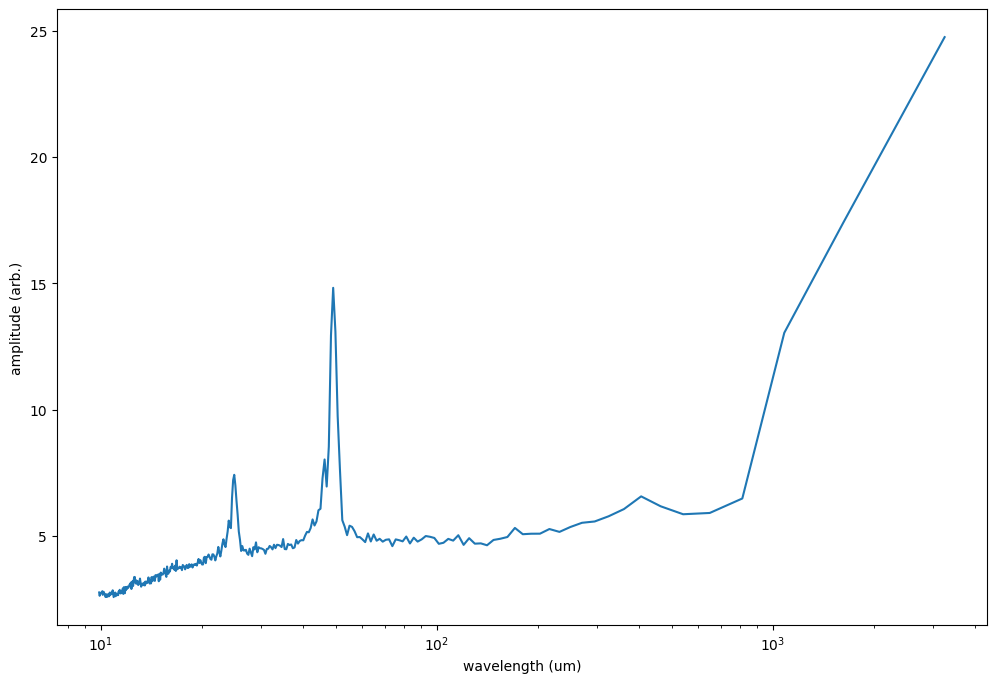

In [86]:
# find amplitudes from fourier

#average_FT = np.fft.fftshift(average_FT) #rearranges the array such that 0,0 at the beginning

amplitude = np.zeros(num_of_freqs)
amplitude[0] = np.abs(average_FT[0])

if (samples//2 == samples/2): #if even
        amplitude[num_of_freqs-1] = np.abs(average_FT[num_of_freqs-1])
        amplitude[1:-1] = (np.abs( average_FT[1:num_of_freqs-1] ) +
                        np.abs( average_FT[:num_of_freqs-1:-1] ))
else:
        amplitude[1:] = (np.abs( average_FT[1:num_of_freqs] ) +
                        np.abs( average_FT[:num_of_freqs-1:-1] ))

#convert (spatical) freqencies into wavelengths
wavelengths = -1/freqs[:-num_of_freqs +2]

plt.figure(figsize = (12,8))
plt.subplot(1, 1, 1)

plt.plot(wavelengths[:-1],
        amplitude[-2::-1]) #the largest wavelength is the smallest frequency so the order needs to be reversed
plt.xlabel('wavelength (um)')
plt.ylabel('amplitude (arb.)')
plt.xscale("log")

plt.show()